<a href="https://colab.research.google.com/github/vinismachadoo/alura_imersao_dados_2/blob/main/microdados_enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas --quiet
!pip install squarify --quiet

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 13.6MB/s 
     |████████████████████████████████| 14.8MB 251kB/s 


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText
import squarify
import geopandas as gpd

import sys
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=200
pd.options.display.max_columns=200

In [ ]:
enem = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [ ]:
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
enem.shape

(127380, 136)

In [ ]:
enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
enem.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,127380.000000,127380.000000,127380.000000,71978.000000,127380.000000,2.862700e+04,2.862700e+04,28627.000000,28627.000000,28627.000000,28627.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,...,127380.000000,127380.0,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,92758.000000,98043.000000,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,1.540493,2.961870,1.330515,1.004585,0.120906,3.125412e+07,3.127669e+06,31.120690,2.257764,1.035037,1.005973,0.001099,0.000110,0.000259,0.000377,0.000008,0.001499,0.000479,0.001704,0.000353,0.000055,0.000228,0.000228,0.000659,0.000251,0.000746,0.000047,0.000008,0.001342,0.000039,...,0.000016,0.0,0.000008,0.000008,0.0,0.000118,0.000016,0.000008,0.0,0.0,0.000079,0.000031,0.000063,0.000008,0.0,0.000047,0.000079,3.088090e+06,30.730735,0.729016,0.771667,0.771667,0.729016,504.508538,508.511745,512.506910,516.509864,477.964015,507.365912,520.463928,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,0.716452,4.106733,0.555043,0.067556,0.326019,9.564098e+06,9.600084e+05,9.569764,0.755357,0.183876,0.122273,0.033134,0.010483,0.016094,0.019408,0.002802,0.038694,0.021878,0.041239,0.018792,0.007413,0.015087,0.015087,0.025671,0.015848,0.027299,0.006863,0.002802,0.036615,0.006265,...,0.003962,0.0,0.002802,0.002802,0.0,0.010851,0.003962,0.002802,0.0,0.0,0.008860,0.005604,0.007925,0.002802,0.0,0.006863,0.008860,9.966122e+05,9.935942,0.445387,0.422110,0.422110,0.445387,1.197953,1.185302,1.163769,1.146852,76.296099,82.972839,64.556578,109.416939,0.499402,0.777411,33.250346,42.786693,40.030347,37.953250,59.380566,188.076455,1.475714
min,1.900010e+11,2019.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100006e+07,1.100015e+06,11.000000,1.000000,1.000000

In [ ]:
enem.isnull().sum()

NU_INSCRICAO                       0
NU_ANO                             0
CO_MUNICIPIO_RESIDENCIA            0
NO_MUNICIPIO_RESIDENCIA            0
CO_UF_RESIDENCIA                   0
SG_UF_RESIDENCIA                   0
NU_IDADE                           0
TP_SEXO                            0
TP_ESTADO_CIVIL                    0
TP_COR_RACA                        0
TP_NACIONALIDADE                   0
CO_MUNICIPIO_NASCIMENTO         3623
NO_MUNICIPIO_NASCIMENTO         3623
CO_UF_NASCIMENTO                3623
SG_UF_NASCIMENTO                3623
TP_ST_CONCLUSAO                    0
TP_ANO_CONCLUIU                    0
TP_ESCOLA                          0
TP_ENSINO                      55402
IN_TREINEIRO                       0
CO_ESCOLA                      98753
CO_MUNICIPIO_ESC               98753
NO_MUNICIPIO_ESC               98753
CO_UF_ESC                      98753
SG_UF_ESC                      98753
TP_DEPENDENCIA_ADM_ESC         98753
TP_LOCALIZACAO_ESC             98753
T

In [175]:
enem['TP_PRESENCA_LC'].value_counts()

1    98043
0    29211
2      126
Name: TP_PRESENCA_LC, dtype: int64

In [176]:
enem['TP_PRESENCA_CH'].value_counts()

1    98043
0    29211
2      126
Name: TP_PRESENCA_CH, dtype: int64

In [177]:
enem['TP_PRESENCA_MT'].value_counts()

1    92758
0    34570
2       52
Name: TP_PRESENCA_MT, dtype: int64

In [178]:
enem['TP_PRESENCA_CN'].value_counts()

1    92758
0    34570
2       52
Name: TP_PRESENCA_CN, dtype: int64

In [179]:
enem['TP_STATUS_REDACAO'].value_counts()

1.0    94538
4.0     1444
6.0      914
3.0      550
8.0      217
2.0      144
9.0      134
7.0      102
Name: TP_STATUS_REDACAO, dtype: int64

In [ ]:
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/vinismachadoo/alura_imersao_dados_2/main/uf_brasil.geojson')

In [ ]:
mapa_brasil['codigo_ibg'] = mapa_brasil['codigo_ibg'].astype('int')

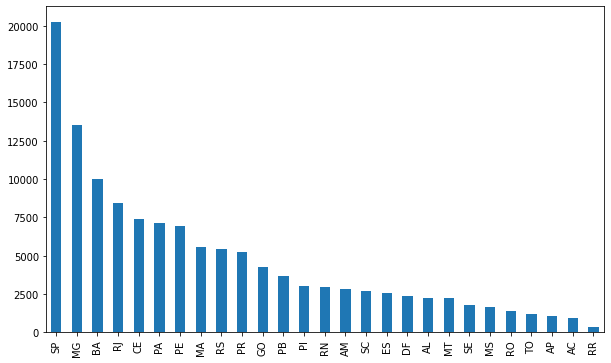

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
enem['SG_UF_RESIDENCIA'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
inscritos_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem['CO_UF_RESIDENCIA'].value_counts()], axis=1)

[]

[]

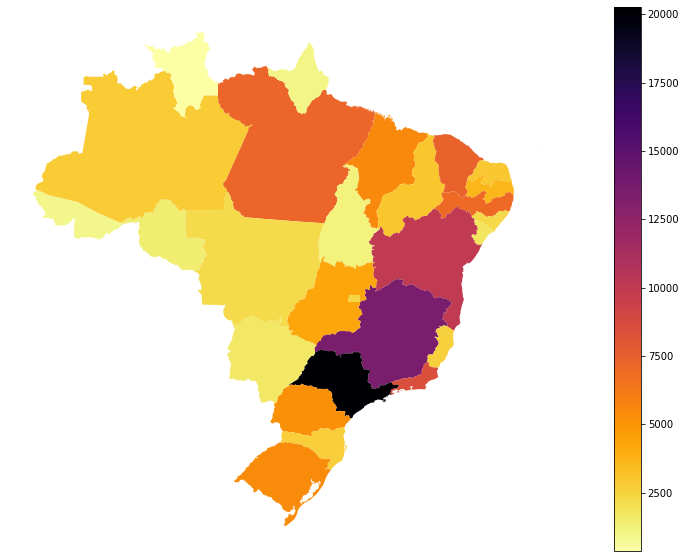

In [134]:
fig,ax = plt.subplots(figsize=(16,10))
inscritos_por_estado.plot(ax=ax, column='CO_UF_RESIDENCIA', cmap='inferno_r', legend=True)
sns.despine(bottom=True, left=True)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [110]:
relacao_renda_raca = enem.groupby('Q006')['TP_COR_RACA'].value_counts(normalize=True).unstack()
relacao_renda_raca.rename(columns={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)

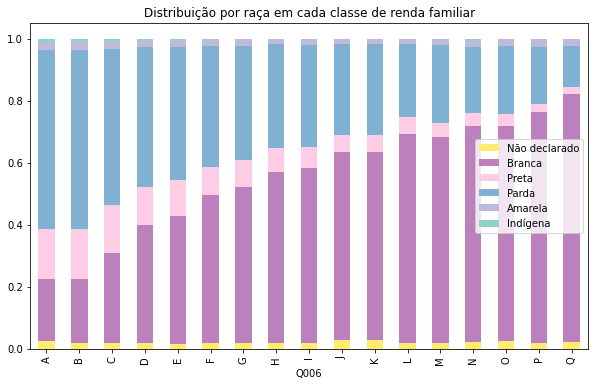

In [142]:
fig, ax = plt.subplots(figsize=(10,6))
relacao_renda_raca.plot(kind='bar', stacked=True, title='Distribuição por raça em cada classe de renda familiar', colormap='Set3_r', ax=ax)
plt.legend()
plt.show()

In [ ]:
relacao_renda_escola = enem.groupby('Q006')['TP_DEPENDENCIA_ADM_ESC'].value_counts().groupby(level=0).apply(lambda x: 100*x / x.sum()).unstack()

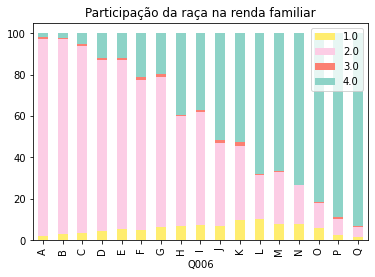

In [ ]:
relacao_renda_escola.plot(kind='bar', stacked=True, title='Participação da raça na renda familiar', colormap='Set3_r')
plt.legend()
plt.show()

In [ ]:
enem['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
18    21452
19    14418
20    10413
21     7267
22     5924
23     4668
24     3838
25     3128
26     2717
27     2214
28     1967
29     1620
30     1594
31     1460
32     1307
33     1163
34     1029
35      934
36      893
37      890
38      790
39      699
40      642
41      548
42      487
43      442
44      396
45      378
46      342
47      302
48      280
49      269
50      219
51      186
52      203
53      165
54      146
55      116
56      109
57      100
58       64
59       60
60       48
61       47
62       39
63       45
64       32
65       13
66       13
67       15
68       14
69       12
70        9
71        4
72        3
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, dtype: int64

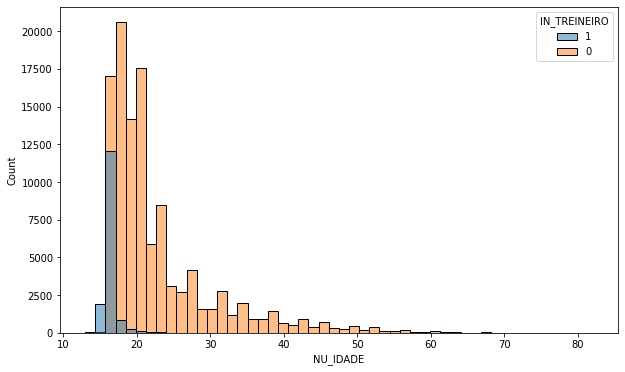

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=enem, x='NU_IDADE', hue='IN_TREINEIRO', hue_order=[1,0], bins=50, ax=ax)
plt.show()

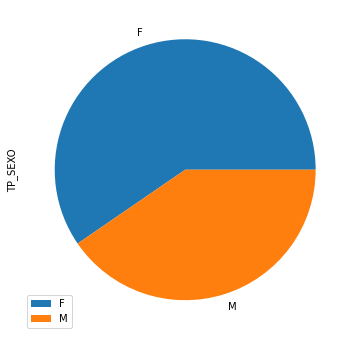

In [146]:
fig, ax = plt.subplots(figsize=(10,6))
enem['TP_SEXO'].value_counts().plot(kind='pie', legend=True, ax=ax, )
plt.legend()
plt.show()

In [180]:
df_notas = enem[['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

In [181]:
df_notas.describe()

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,92758.000000,98043.000000,98043.000000,98043.000000
mean,477.964015,523.555206,507.365912,520.463928,571.570025
std,76.296099,109.416939,82.972839,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,435.300000,447.900000,483.700000,480.000000
50%,470.200000,501.600000,510.900000,526.100000,580.000000
75%,533.300000,598.200000,567.100000,565.100000,680.000000
max,797.300000,985.000000,809.400000,801.700000,1000.000000


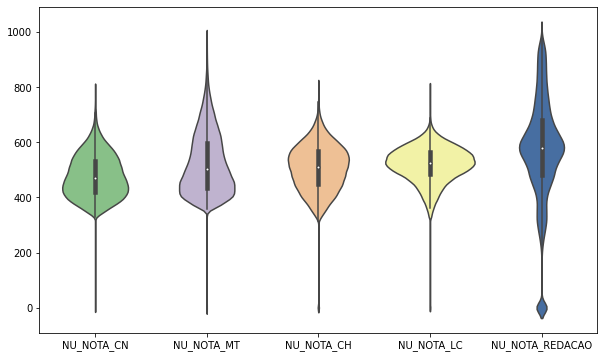

In [182]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df_notas, palette="Accent", ax=ax)
plt.show()

In [ ]:
#quantas pessoas faltaram o 1 dia
#quantas pessoas faltaram o 2 dia
#quantas faltaram os 2 dias

In [ ]:
#Quem faltou tem alguma relação com renda? com estado? se estuda em um lugar e faz em outro?

In [166]:
classes_renda = enem['Q006'].unique()
classes_renda.sort()

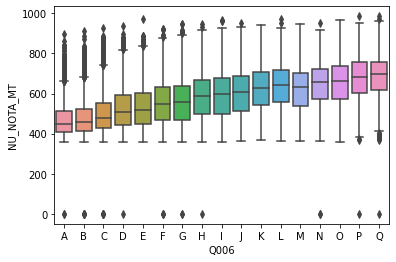

In [170]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_MT', order=classes_renda)

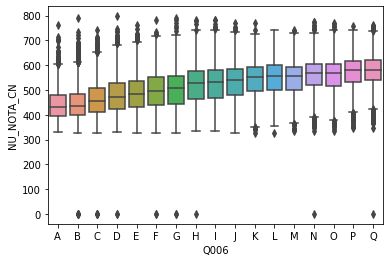

In [171]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_CN', order=classes_renda)

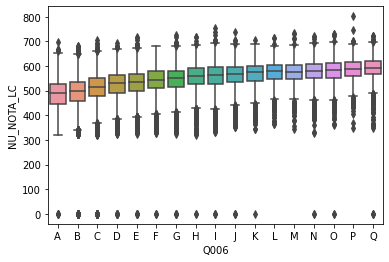

In [172]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_LC', order=classes_renda)

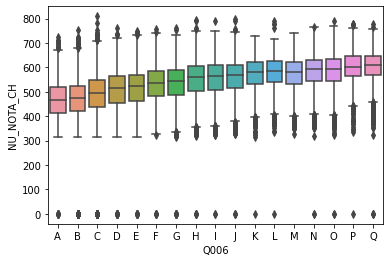

In [173]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_CH', order=classes_renda)

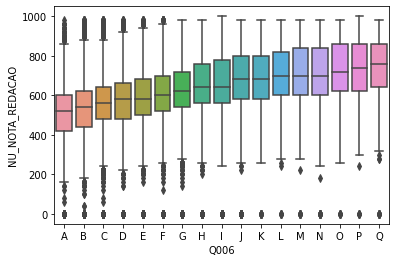

In [174]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_REDACAO', order=classes_renda)

In [184]:
enem["NU_NOTA_SOMA"] = df_notas.sum(axis=1)

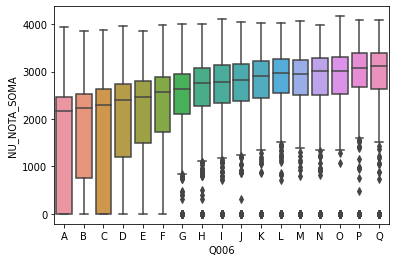

In [185]:
sns.boxplot(data=enem, x='Q006', y='NU_NOTA_SOMA', order=classes_renda)